# OPTIMIZACION PORTAFOLIOS DE INVERSION CON SIMULACION MONTE CARLO
Ing. Carlos Crespo Elizondo, MSF<br>
MF-013 Análisis de Inversión<br>
Clase del 23 de noviembre 2021<br>
<br>
Maestría de Finanzas, Facultad de Economía<br>
UANL<br>

## OBJETIVO

Generar un algoritmo de mayor complejidad seleccionando de manera cuantitativa las acciones que formaran un portafolio de inversión.

## PASOS A SEGUIR

1. Importar librerías
1. Importar precios de cierre
1. Calcular retornos diarios
1. Anualizar retornos promedios diarios
1. Calcular $\sigma$ diaria
1. Anualizar $\sigma$ diaria
1. Graficar dispersiones de los retornos anuales Vs $\sigma$ anual
1. Seleccionar de manera cuantitativa las acciones que formaran el portafolio (Sharp Ratio)
1. Calcular matriz de covarianza  de las acciones seleccionadas
1. Crear array NumPy para guardar los resultados de las simulaciones.  Debe de incluir las siguientes columnas:
  1. \# de simulación
  1. Retorno generado por el portafolio
  1. $\sigma$ del portafolio
  1. Sharp Ratio del portafolio
  1. y el nombre de cada acción que forman el portafolio
1. Realizar simulación Monte Carlo
1. Visualizar portafolio
1. Visualizar resultados óptimos

## Desarrollo del código

### 1. Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pylab import plt
plt.style.use('seaborn')

### 2. Importar precios de cierre

In [2]:
url = 'http://bit.ly/oncedos-precios_simulados'
precios = pd.read_csv(url, index_col = 0)

In [3]:
precios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Accion0   201 non-null    float64
 1   Accion1   201 non-null    float64
 2   Accion2   201 non-null    float64
 3   Accion3   201 non-null    float64
 4   Accion4   201 non-null    float64
 5   Accion5   201 non-null    float64
 6   Accion6   201 non-null    float64
 7   Accion7   201 non-null    float64
 8   Accion8   201 non-null    float64
 9   Accion9   201 non-null    float64
 10  Accion10  201 non-null    float64
 11  Accion11  201 non-null    float64
 12  Accion12  201 non-null    float64
 13  Accion13  201 non-null    float64
 14  Accion14  201 non-null    float64
 15  Accion15  201 non-null    float64
 16  Accion16  201 non-null    float64
 17  Accion17  201 non-null    float64
 18  Accion18  201 non-null    float64
 19  Accion19  201 non-null    float64
 20  Accion20  201 non-null    float6

In [4]:
precios.head()

,Accion0,Accion1,Accion2,Accion3,Accion4,Accion5,Accion6,Accion7,Accion8,Accion9,...,Accion30,Accion31,Accion32,Accion33,Accion34,Accion35,Accion36,Accion37,Accion38,Accion39
0,40.995900,70.992900,1.999800,60.993900,79.992000,67.993200,55.994400,4.999500,22.997700,38.996100,...,91.990800,9.999000,25.997400,4.999500,87.991200,38.996100,29.997000,66.993300,13.998600,95.990400
1,40.698491,69.671915,2.047781,60.670522,80.567590,66.860894,53.947857,4.912759,22.783697,39.304387,...,90.528940,10.004220,25.881322,5.014650,87.049429,39.494138,30.440621,68.232542,14.007555,96.570415
2,41.504340,71.096739,2.086085,60.289619,78.818212,68.108852,54.694954,5.006299,22.787126,38.636191,...,89.905912,10.007505,25.505724,5.046739,87.233678,39.041348,30.428664,68.098878,14.183955,96.407459
3,41.517641,71.033554,2.065115,59.681391,77.378489,67.948195,54.999276,4.965301,22.931905,38.463850,...,90.006099,10.109341,25.544970,4.958711,88.512606,38.503918,29.334598,68.842518,14.200047,98.291341
4,40.249454,70.700620,2.083627,59.362813,76.692071,66.920780,55.792036,4.826201,23.117594,39.391378,...,91.649756,10.157348,25.225436,5.001837,87.530565,38.775289,28.724309,69.457394,14.288520,98.209973


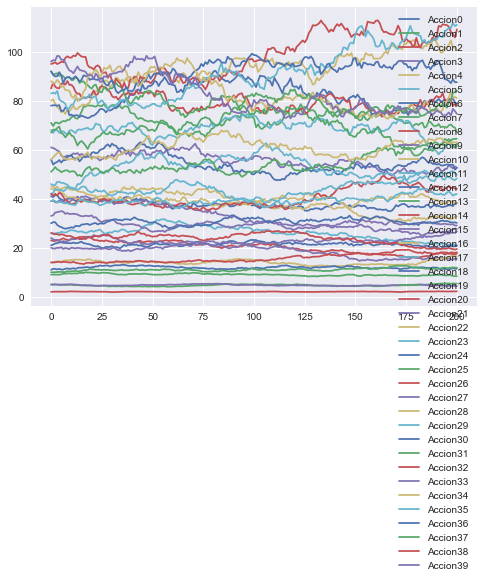

In [5]:
precios.plot();

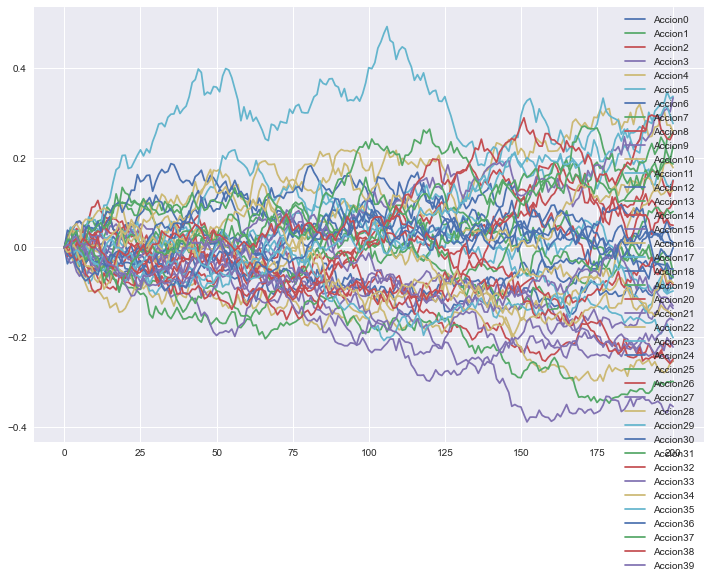

In [6]:
(precios/precios.iloc[0,:]-1).plot(figsize=(12,8));

In [7]:
universo = list(precios.columns)
universo

['Accion0',
 'Accion1',
 'Accion2',
 'Accion3',
 'Accion4',
 'Accion5',
 'Accion6',
 'Accion7',
 'Accion8',
 'Accion9',
 'Accion10',
 'Accion11',
 'Accion12',
 'Accion13',
 'Accion14',
 'Accion15',
 'Accion16',
 'Accion17',
 'Accion18',
 'Accion19',
 'Accion20',
 'Accion21',
 'Accion22',
 'Accion23',
 'Accion24',
 'Accion25',
 'Accion26',
 'Accion27',
 'Accion28',
 'Accion29',
 'Accion30',
 'Accion31',
 'Accion32',
 'Accion33',
 'Accion34',
 'Accion35',
 'Accion36',
 'Accion37',
 'Accion38',
 'Accion39']

### 3. Calcular retornos diarios

In [8]:
retornos = np.log(precios/precios.shift(1))
retornos.dropna(inplace = True)

In [9]:
retornos.head()

,Accion0,Accion1,Accion2,Accion3,Accion4,Accion5,Accion6,Accion7,Accion8,Accion9,...,Accion30,Accion31,Accion32,Accion33,Accion34,Accion35,Accion36,Accion37,Accion38,Accion39
1,-0.007281,-0.018783,0.023709,-0.005316,0.007170,-0.016793,-0.037234,-0.017502,-0.009349,0.007874,...,-0.016019,0.000522,-0.004475,0.003026,-0.010761,0.012691,0.014681,0.018329,0.000640,0.006024
2,0.019607,0.020244,0.018533,-0.006298,-0.021952,0.018493,0.013753,0.018861,0.000150,-0.017147,...,-0.006906,0.000328,-0.014619,0.006379,0.002114,-0.011531,-0.000393,-0.001961,0.012515,-0.001689
3,0.000320,-0.000889,-0.010104,-0.010140,-0.018435,-0.002362,0.005549,-0.008223,0.006333,-0.004471,...,0.001114,0.010125,0.001538,-0.017596,0.014555,-0.013861,-0.036617,0.010861,0.001134,0.019352
4,-0.031022,-0.004698,0.008924,-0.005352,-0.008910,-0.015236,0.014311,-0.028414,0.008065,0.023828,...,0.018097,0.004737,-0.012588,0.008659,-0.011157,0.007023,-0.021024,0.008892,0.006211,-0.000828
5,-0.012613,0.008714,-0.005975,-0.030237,-0.018568,0.006160,-0.018287,-0.007496,0.015799,-0.011905,...,-0.013583,-0.001442,0.010717,-0.004663,-0.022870,-0.004751,-0.009519,-0.038923,-0.017245,-0.015167


In [10]:
retornos.sum()

Accion0    -0.067674
Accion1    -0.055984
Accion2     0.096798
Accion3    -0.146384
Accion4     0.228582
Accion5    -0.102230
Accion6    -0.062854
Accion7     0.077060
Accion8    -0.236432
Accion9    -0.293171
Accion10   -0.163150
Accion11   -0.224820
Accion12    0.010931
Accion13   -0.069962
Accion14   -0.086447
Accion15   -0.176006
Accion16   -0.291717
Accion17    0.140056
Accion18   -0.000940
Accion19   -0.354876
Accion20    0.138656
Accion21   -0.438310
Accion22    0.163605
Accion23    0.290335
Accion24    0.043140
Accion25    0.202572
Accion26    0.048319
Accion27    0.287776
Accion28    0.120016
Accion29   -0.093946
Accion30   -0.049285
Accion31    0.170553
Accion32   -0.286444
Accion33   -0.139509
Accion34   -0.082518
Accion35    0.243783
Accion36    0.005877
Accion37    0.227676
Accion38    0.227223
Accion39   -0.251248
dtype: float64

### 4. Anualizar retornos promedios diarios

In [11]:
retornos_promedio = retornos.mean()
retornos_promedio

Accion0    -0.000338
Accion1    -0.000280
Accion2     0.000484
Accion3    -0.000732
Accion4     0.001143
Accion5    -0.000511
Accion6    -0.000314
Accion7     0.000385
Accion8    -0.001182
Accion9    -0.001466
Accion10   -0.000816
Accion11   -0.001124
Accion12    0.000055
Accion13   -0.000350
Accion14   -0.000432
Accion15   -0.000880
Accion16   -0.001459
Accion17    0.000700
Accion18   -0.000005
Accion19   -0.001774
Accion20    0.000693
Accion21   -0.002192
Accion22    0.000818
Accion23    0.001452
Accion24    0.000216
Accion25    0.001013
Accion26    0.000242
Accion27    0.001439
Accion28    0.000600
Accion29   -0.000470
Accion30   -0.000246
Accion31    0.000853
Accion32   -0.001432
Accion33   -0.000698
Accion34   -0.000413
Accion35    0.001219
Accion36    0.000029
Accion37    0.001138
Accion38    0.001136
Accion39   -0.001256
dtype: float64

In [12]:
retornos_promedio['Accion38']

0.0011361152744887575

In [13]:
retornos_promedio_anual = retornos_promedio * 252
retornos_promedio_anual

Accion0    -0.085270
Accion1    -0.070540
Accion2     0.121965
Accion3    -0.184443
Accion4     0.288013
Accion5    -0.128810
Accion6    -0.079195
Accion7     0.097096
Accion8    -0.297905
Accion9    -0.369396
Accion10   -0.205569
Accion11   -0.283273
Accion12    0.013773
Accion13   -0.088152
Accion14   -0.108923
Accion15   -0.221768
Accion16   -0.367563
Accion17    0.176471
Accion18   -0.001184
Accion19   -0.447144
Accion20    0.174707
Accion21   -0.552271
Accion22    0.206142
Accion23    0.365822
Accion24    0.054357
Accion25    0.255241
Accion26    0.060882
Accion27    0.362597
Accion28    0.151220
Accion29   -0.118372
Accion30   -0.062099
Accion31    0.214897
Accion32   -0.360920
Accion33   -0.175781
Accion34   -0.103972
Accion35    0.307166
Accion36    0.007406
Accion37    0.286872
Accion38    0.286301
Accion39   -0.316573
dtype: float64

### 5. Calcular  $\sigma$  diaria

In [14]:
sigma = retornos.std()
sigma

Accion0     0.013829
Accion1     0.013395
Accion2     0.015135
Accion3     0.013819
Accion4     0.014101
Accion5     0.014067
Accion6     0.014240
Accion7     0.015909
Accion8     0.013760
Accion9     0.014001
Accion10    0.015127
Accion11    0.013623
Accion12    0.013978
Accion13    0.012382
Accion14    0.014042
Accion15    0.013239
Accion16    0.013494
Accion17    0.014596
Accion18    0.015112
Accion19    0.013298
Accion20    0.014259
Accion21    0.015394
Accion22    0.014750
Accion23    0.014517
Accion24    0.014428
Accion25    0.014500
Accion26    0.016104
Accion27    0.014788
Accion28    0.013170
Accion29    0.014054
Accion30    0.012580
Accion31    0.013510
Accion32    0.014124
Accion33    0.014166
Accion34    0.015751
Accion35    0.012881
Accion36    0.013246
Accion37    0.013871
Accion38    0.013002
Accion39    0.014398
dtype: float64

### 6. Anualizar  $\sigma$  diaria

In [15]:
sigma_anual = sigma * np.sqrt(252)
sigma_anual

Accion0     0.219534
Accion1     0.212635
Accion2     0.240257
Accion3     0.219371
Accion4     0.223843
Accion5     0.223311
Accion6     0.226048
Accion7     0.252550
Accion8     0.218439
Accion9     0.222264
Accion10    0.240137
Accion11    0.216256
Accion12    0.221892
Accion13    0.196552
Accion14    0.222908
Accion15    0.210160
Accion16    0.214208
Accion17    0.231710
Accion18    0.239895
Accion19    0.211107
Accion20    0.226361
Accion21    0.244368
Accion22    0.234156
Accion23    0.230446
Accion24    0.229030
Accion25    0.230185
Accion26    0.255642
Accion27    0.234750
Accion28    0.209060
Accion29    0.223104
Accion30    0.199695
Accion31    0.214469
Accion32    0.224212
Accion33    0.224885
Accion34    0.250042
Accion35    0.204475
Accion36    0.210277
Accion37    0.220196
Accion38    0.206399
Accion39    0.228563
dtype: float64

### 7. Graficar dispersiones de los retornos anuales Vs $\sigma$ anual

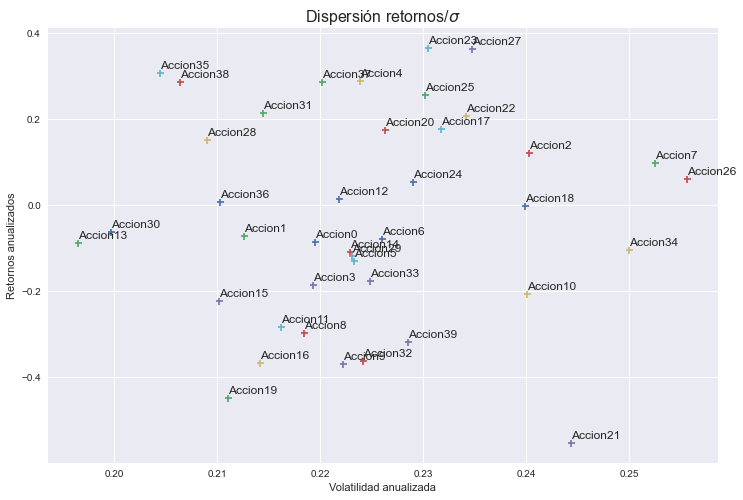

In [16]:
plt.figure(figsize =(12,8))

plt.title('Dispersión retornos/$\sigma$', fontsize = 16)
plt.xlabel('Volatilidad anualizada')
plt.ylabel('Retornos anualizados')

for accion in universo:
    plt.scatter(sigma_anual[accion], retornos_promedio_anual[accion], marker='+', label = accion)
    plt.text(sigma_anual[accion], retornos_promedio_anual[accion] + .01, accion, fontsize = 12);

### 8. Seleccionar de manera cuantitativa las acciones que formaran el portafolio (Sharp Ratio)

$$SharpRatio = \frac{R_p - R_f}{\sigma_p}$$

In [17]:
cetes = 0.05
sharp_ratio = (retornos_promedio_anual - cetes) / sigma_anual

In [18]:
sharp_ratio

Accion0    -0.616166
Accion1    -0.566887
Accion2     0.299534
Accion3    -1.068706
Accion4     1.063301
Accion5    -0.800720
Accion6    -0.571541
Accion7     0.186480
Accion8    -1.592689
Accion9    -1.886922
Accion10   -1.064261
Accion11   -1.541106
Accion12   -0.163263
Accion13   -0.702876
Accion14   -0.712953
Accion15   -1.293149
Accion16   -1.949335
Accion17    0.545815
Accion18   -0.213361
Accion19   -2.354941
Accion20    0.550921
Accion21   -2.464604
Accion22    0.666832
Accion23    1.370480
Accion24    0.019022
Accion25    0.891635
Accion26    0.042569
Accion27    1.331618
Accion28    0.484168
Accion29   -0.754680
Accion30   -0.561353
Accion31    0.768859
Accion32   -1.832727
Accion33   -1.003987
Accion34   -0.615786
Accion35    1.257691
Accion36   -0.202563
Accion37    1.075733
Accion38    1.144873
Accion39   -1.603813
dtype: float64

In [19]:
sharp_ratio.sort_values(ascending = False, inplace = True)

In [20]:
sharp_ratio

Accion23    1.370480
Accion27    1.331618
Accion35    1.257691
Accion38    1.144873
Accion37    1.075733
Accion4     1.063301
Accion25    0.891635
Accion31    0.768859
Accion22    0.666832
Accion20    0.550921
Accion17    0.545815
Accion28    0.484168
Accion2     0.299534
Accion7     0.186480
Accion26    0.042569
Accion24    0.019022
Accion12   -0.163263
Accion36   -0.202563
Accion18   -0.213361
Accion30   -0.561353
Accion1    -0.566887
Accion6    -0.571541
Accion34   -0.615786
Accion0    -0.616166
Accion13   -0.702876
Accion14   -0.712953
Accion29   -0.754680
Accion5    -0.800720
Accion33   -1.003987
Accion10   -1.064261
Accion3    -1.068706
Accion15   -1.293149
Accion11   -1.541106
Accion8    -1.592689
Accion39   -1.603813
Accion32   -1.832727
Accion9    -1.886922
Accion16   -1.949335
Accion19   -2.354941
Accion21   -2.464604
dtype: float64

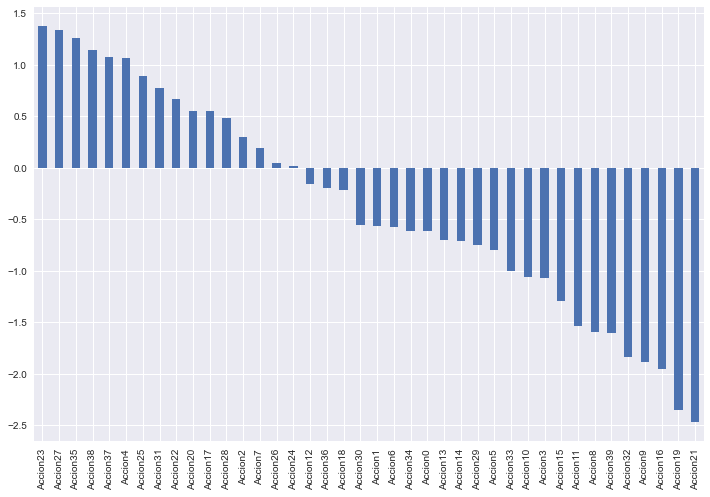

In [21]:
sharp_ratio.plot(kind='bar', figsize = (12,8));

In [22]:
filtro = .5

acciones_portafolio = sharp_ratio[sharp_ratio>filtro]

In [23]:
acciones_portafolio

Accion23    1.370480
Accion27    1.331618
Accion35    1.257691
Accion38    1.144873
Accion37    1.075733
Accion4     1.063301
Accion25    0.891635
Accion31    0.768859
Accion22    0.666832
Accion20    0.550921
Accion17    0.545815
dtype: float64

In [24]:
numero_acciones = len(acciones_portafolio)
nombre_acciones = list(acciones_portafolio.index.values)

In [25]:
numero_acciones

11

In [26]:
nombre_acciones

['Accion23',
 'Accion27',
 'Accion35',
 'Accion38',
 'Accion37',
 'Accion4',
 'Accion25',
 'Accion31',
 'Accion22',
 'Accion20',
 'Accion17']

### 9. Calcular matriz de covarianza de las acciones seleccionadas

In [27]:
matriz_cov_port = retornos[nombre_acciones].cov()
matriz_cov_port

,Accion23,Accion27,Accion35,Accion38,Accion37,Accion4,Accion25,Accion31,Accion22,Accion20,Accion17
Accion23,2.107357e-04,-0.000003,-0.000017,7.379552e-06,-6.841777e-07,-1.184340e-05,0.000001,6.467445e-06,0.000001,-0.000010,-0.000010
Accion27,-3.276999e-06,0.000219,0.000019,-2.968890e-06,-2.262399e-05,1.626498e-05,-0.000025,5.843456e-06,-0.000029,0.000001,-0.000002
Accion35,-1.664528e-05,0.000019,0.000166,1.445400e-05,-1.650066e-05,6.750493e-06,-0.000015,2.395769e-06,0.000004,-0.000011,0.000006
Accion38,7.379552e-06,-0.000003,0.000014,1.690503e-04,-1.005292e-05,6.956355e-07,0.000001,3.281043e-07,0.000020,0.000005,-0.000005
Accion37,-6.841777e-07,-0.000023,-0.000017,-1.005292e-05,1.924061e-04,1.326134e-06,-0.000005,7.001423e-06,0.000020,0.000010,-0.000009
Accion4,-1.184340e-05,0.000016,0.000007,6.956355e-07,1.326134e-06,1.988325e-04,-0.000005,2.533759e-05,-0.000003,-0.000044,0.000004
Accion25,1.036331e-06,-0.000025,-0.000015,1.316306e-06,-4.977045e-06,-4.565663e-06,0.000210,1.920656e-05,-0.000003,0.000001,0.000022
Accion31,6.467445e-06,0.000006,0.000002,3.281043e-07,7.001423e-06,2.533759e-05,0.000019,1.825283e-04,-0.000013,0.000015,-0.000006
Accion22,1.371931e-06,-0.000029,0.000004,1.955257e-05,2.014949e-05,-3.111465e-06,-0.000003,-1.329074e-05,0.000218,-0.000029,0.000010
Accion20,-1.046193e-05,0.000001,-0.000011,5.438241e-06,1.047343e-05,-4.377862e-05,0.000001,1.483053e-05,-0.000029,0.000203,-0.000008


### 10. Crear array NumPy para guardar los resultados de las simulaciones

In [43]:
num_simulaciones = 30000

In [44]:
simulacion = np.zeros((num_simulaciones, 4 + numero_acciones))

In [45]:
simulacion.shape

(30000, 15)

### 11. Realizar simulación Monte Carlo

In [46]:
for i in range(num_simulaciones):
    
    #Calcular el w aleatorio inicial para cada acción del portafolio
    np.random.seed(i)
    w = np.random.random(numero_acciones)
    w = w/np.sum(w)
    
    #Calcular E(Rp), Var y sigma anual:
    retorno_portafolio = np.sum(retornos_promedio_anual[nombre_acciones]*w)
    var_portafolio = np.dot(w.T, np.dot(matriz_cov_port, w))
    sigma_portafolio = np.sqrt(var_portafolio) * np.sqrt(252)
    sharp_ratio = (retorno_portafolio - cetes) / sigma_portafolio
    
    simulacion[i,0] = i + 1
    simulacion[i,1] = retorno_portafolio
    simulacion[i,2] = sigma_portafolio
    simulacion[i,3] = sharp_ratio
    
    for j in range(len(w)):
        simulacion[i, 4 + j] = w[j]

### 12. Visualizar portafolio

In [47]:
simulacion

array([[1.00000000e+00, 2.61532490e-01, 6.99643712e-02, ...,
        1.38668726e-01, 5.51763013e-02, 1.13927306e-01],
       [2.00000000e+00, 2.63844395e-01, 7.68981374e-02, ...,
        1.11280004e-01, 1.51120070e-01, 1.17570039e-01],
       [3.00000000e+00, 2.56920391e-01, 7.29414298e-02, ...,
        7.11913570e-02, 6.33922894e-02, 1.47567731e-01],
       ...,
       [2.99980000e+04, 2.68975910e-01, 8.33675555e-02, ...,
        7.35355977e-02, 1.10379652e-01, 5.01307815e-03],
       [2.99990000e+04, 2.71097674e-01, 6.90206569e-02, ...,
        6.35495405e-02, 7.88282718e-02, 9.73348401e-02],
       [3.00000000e+04, 2.67519154e-01, 6.96630315e-02, ...,
        9.59243247e-02, 3.17839087e-02, 1.00617428e-01]])

In [48]:
resultados = pd.DataFrame(simulacion)
resultados

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.261532,0.069964,3.023432,0.078973,0.102914,0.086736,0.078407,0.060963,0.092943,0.062968,0.128324,0.138669,0.055176,0.113927
1,2.0,0.263844,0.076898,2.780879,0.116961,0.202027,0.000032,0.084794,0.041160,0.025898,0.052240,0.096918,0.111280,0.151120,0.117570
2,3.0,0.256920,0.072941,2.836802,0.103583,0.006160,0.130588,0.103423,0.099870,0.078480,0.048620,0.147125,0.071191,0.063392,0.147568
3,4.0,0.292815,0.079142,3.068102,0.117069,0.150513,0.061830,0.108574,0.189791,0.190502,0.026692,0.044048,0.010939,0.093692,0.006350
4,5.0,0.279378,0.072233,3.175520,0.147295,0.083353,0.148157,0.108879,0.106276,0.032914,0.148703,0.000949,0.038534,0.066226,0.118714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996.0,0.244125,0.077749,2.496817,0.050458,0.084540,0.065893,0.014045,0.059449,0.068100,0.168677,0.016727,0.147377,0.142676,0.182058
29996,29997.0,0.243613,0.076893,2.517952,0.094905,0.093038,0.049101,0.026296,0.001113,0.051254,0.087394,0.168094,0.121808,0.140232,0.166764
29997,29998.0,0.268976,0.083368,2.626632,0.065225,0.022516,0.081519,0.024167,0.223673,0.241975,0.077912,0.074084,0.073536,0.110380,0.005013
29998,29999.0,0.271098,0.069021,3.203355,0.095328,0.050370,0.124244,0.077482,0.112324,0.158568,0.127985,0.013986,0.063550,0.078828,0.097335


In [49]:
nombre_columnas = ['# simulación', 'Ret', 'Sigma', 'Sharp'] + nombre_acciones
resultados.columns = nombre_columnas

In [51]:
resultados

,# simulación,Ret,Sigma,Sharp,Accion23,Accion27,Accion35,Accion38,Accion37,Accion4,Accion25,Accion31,Accion22,Accion20,Accion17
0,1.0,0.261532,0.069964,3.023432,0.078973,0.102914,0.086736,0.078407,0.060963,0.092943,0.062968,0.128324,0.138669,0.055176,0.113927
1,2.0,0.263844,0.076898,2.780879,0.116961,0.202027,0.000032,0.084794,0.041160,0.025898,0.052240,0.096918,0.111280,0.151120,0.117570
2,3.0,0.256920,0.072941,2.836802,0.103583,0.006160,0.130588,0.103423,0.099870,0.078480,0.048620,0.147125,0.071191,0.063392,0.147568
3,4.0,0.292815,0.079142,3.068102,0.117069,0.150513,0.061830,0.108574,0.189791,0.190502,0.026692,0.044048,0.010939,0.093692,0.006350
4,5.0,0.279378,0.072233,3.175520,0.147295,0.083353,0.148157,0.108879,0.106276,0.032914,0.148703,0.000949,0.038534,0.066226,0.118714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996.0,0.244125,0.077749,2.496817,0.050458,0.084540,0.065893,0.014045,0.059449,0.068100,0.168677,0.016727,0.147377,0.142676,0.182058
29996,29997.0,0.243613,0.076893,2.517952,0.094905,0.093038,0.049101,0.026296,0.001113,0.051254,0.087394,0.168094,0.121808,0.140232,0.166764
29997,29998.0,0.268976,0.083368,2.626632,0.065225,0.022516,0.081519,0.024167,0.223673,0.241975,0.077912,0.074084,0.073536,0.110380,0.005013
29998,29999.0,0.271098,0.069021,3.203355,0.095328,0.050370,0.124244,0.077482,0.112324,0.158568,0.127985,0.013986,0.063550,0.078828,0.097335


In [52]:
port_max_sharp = resultados.iloc[resultados['Sharp'].idxmax()]
port_min_vol = resultados.iloc[resultados['Sigma'].idxmin()]

In [53]:
port_max_sharp

# simulación    24288.000000
Ret                 0.288486
Sigma               0.069137
Sharp               3.449490
Accion23            0.118086
Accion27            0.138794
Accion35            0.118381
Accion38            0.091501
Accion37            0.133886
Accion4             0.114247
Accion25            0.090785
Accion31            0.058283
Accion22            0.050470
Accion20            0.063317
Accion17            0.022250
Name: 24287, dtype: float64

In [54]:
port_min_vol

# simulación    7631.000000
Ret                0.269099
Sigma              0.065492
Sharp              3.345413
Accion23           0.096193
Accion27           0.092589
Accion35           0.113432
Accion38           0.113676
Accion37           0.085061
Accion4            0.074818
Accion25           0.092939
Accion31           0.054076
Accion22           0.098634
Accion20           0.108445
Accion17           0.070137
Name: 7630, dtype: float64

### 13. Visualizar resultados óptimos

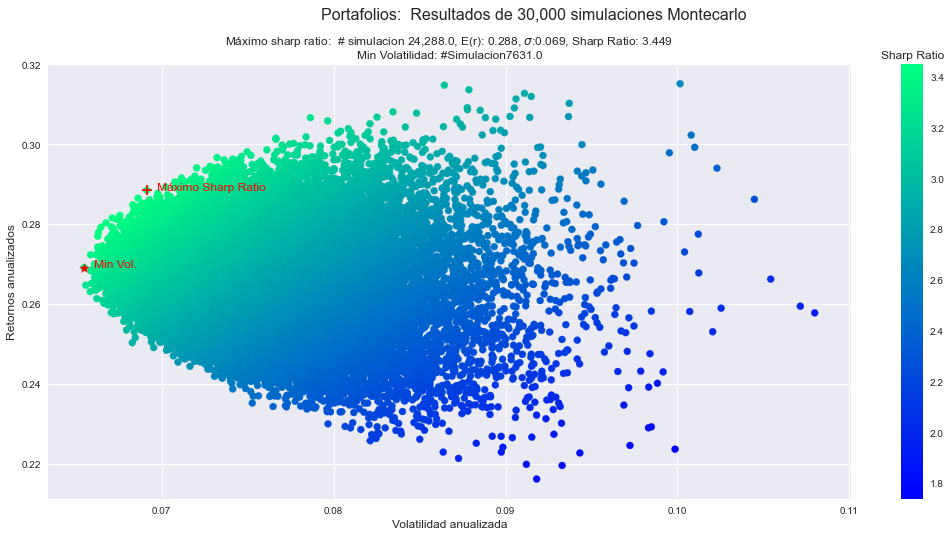

In [58]:
plt.figure(figsize=(18,8))

plt.scatter(x = resultados['Sigma'], y = resultados['Ret'], c=resultados['Sharp'], cmap = 'winter', label = 'Resultados simulaciones portafolio')
plt.suptitle(f'Portafolios:  Resultados de {num_simulaciones:,} simulaciones Montecarlo', fontsize = 16)
plt.title(f'Máximo sharp ratio:  # simulacion {port_max_sharp[0]:,}, E(r): {port_max_sharp[1]:.3f}, $\sigma$:{port_max_sharp[2]:.3f}, Sharp Ratio: {port_max_sharp[3]:.3f} \nMin Volatilidad: #Simulacion{port_min_vol[0]}')  


clb = plt.colorbar()
clb.ax.set_title('Sharp Ratio')

plt.xlabel('Volatilidad anualizada', fontsize = 12)
plt.ylabel('Retornos anualizados', fontsize=12)

plt.scatter(x = port_max_sharp[2], y=port_max_sharp[1], marker = '+', s = 100, color = 'r', label = 'Max Sharp Ratio')
plt.text(x = port_max_sharp[2], y=port_max_sharp[1], s = '   Máximo Sharp Ratio', color = 'r', fontsize = 12)

plt.scatter(x = port_min_vol[2], y=port_min_vol[1], marker = '*', s = 100, color = 'r')
plt.text(x = port_min_vol[2], y=port_min_vol[1], s = '   Min Vol.', color = 'r', fontsize = 12);
